In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd

# Connect to the Vietnamese data
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

# Load Monthly Prices (HOSE & HNX)
prices_monthly = pd.read_sql_query(
  sql="SELECT symbol, date, ret_excess, mktcap FROM prices_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

# Load Book Equity (derived from Vietnamese Financial Statements)
comp_vn = pd.read_sql_query(
  sql="SELECT datadate, symbol, be FROM comp_vn",
  con=tidy_finance,
  parse_dates={"datadate"}
)

# Load Rolling Market Betas (Pre-calculated in Chapter 'Beta Estimation')
beta_monthly = pd.read_sql_query(
  sql="SELECT symbol, date, beta FROM beta_monthly WHERE return_type = 'monthly'",
  con=tidy_finance,
  parse_dates={"date"}
)

In [3]:
# Prepare Characteristics
characteristics = (comp_vn
  # Align reporting date to month end
  .assign(date=lambda x: pd.to_datetime(x["datadate"]) + MonthEnd(0))
  # Merge with price data to get Market Cap at fiscal year end
  .merge(prices_monthly[["symbol", "date", "mktcap"]], 
         on=["symbol", "date"], how="inner")
  .assign(
      # Compute Book-to-Market
      bm=lambda x: x["be"] / x["mktcap"],
      # Create sorting date: Financials valid from July of year t+1
      sorting_date=lambda x: x["date"] + pd.DateOffset(months=6) + MonthEnd(0)
  )
  .get(["symbol", "bm", "sorting_date"])
)

# Merge back to monthly return panel
data_fm = (prices_monthly
  .merge(characteristics, 
         left_on=["symbol", "date"], 
         right_on=["symbol", "sorting_date"], 
         how="left")
  .merge(beta_monthly, on=["symbol", "date"], how="left")
  .sort_values(["symbol", "date"])
)

# Forward fill characteristics for 12 months (valid until next report)
data_fm[["bm"]] = data_fm.groupby("symbol")[["bm"]].ffill(limit=12)

# Log Market Cap is updated monthly
data_fm["log_mktcap"] = np.log(data_fm["mktcap"])

# Lead returns: We use characteristics at t to predict return at t+1
data_fm["ret_excess_lead"] = data_fm.groupby("symbol")["ret_excess"].shift(-1)

# Cleaning: Remove rows with missing future returns or characteristics
data_fm = data_fm.dropna(subset=["ret_excess_lead", "beta", "log_mktcap", "bm"])

print(f"Data ready: {len(data_fm):,} observations from {data_fm.date.min().date()} to {data_fm.date.max().date()}")

Data ready: 67,478 observations from 2016-06-30 to 2023-11-30


In [4]:
def run_cross_section(df):
    # Standardize inputs for numerical stability
    # Note: We do NOT standardize the dependent variable (returns)
    # We standardize regressors to interpret coefficients as "per 1 SD change" if desired,
    # BUT for pure risk premium estimation, we usually keep raw units.
    # Here we use raw units to interpret lambda as % return per unit of characteristic.
    
    # Define Weighted Least Squares
    model = smf.wls(
        formula="ret_excess_lead ~ beta + log_mktcap + bm",
        data=df,
        weights=df["mktcap"] # Weight by size
    )
    results = model.fit()
    
    return results.params

# Apply to every month
risk_premiums = (data_fm
  .groupby("date")
  .apply(run_cross_section)
  .reset_index()
)

print(risk_premiums.head())

        date  Intercept      beta  log_mktcap            bm
0 2016-06-30  -0.213841 -0.035454    0.025800  2.336615e-11
1 2016-07-31   0.192702  0.012807   -0.026880  2.115332e-12
2 2016-08-31   0.288753  0.017908   -0.033139 -4.584291e-11
3 2016-09-30  -0.119197 -0.017241    0.007310  1.858875e-11
4 2016-10-31  -0.030620 -0.010611    0.000911  3.719833e-12


In [5]:
# def calculate_fama_macbeth_stats(df, lags=6):
#     summary = []
    
#     for col in ["Intercept", "beta", "log_mktcap", "bm"]:
#         series = df[col]
        
#         # 1. Point Estimate (Average Risk Premium)
#         mean_premium = series.mean()
        
#         # 2. Newey-West Standard Error
#         # We regress the series on a constant to get the SE of the mean
#         nw_model = sm.OLS(series, sm.add_constant(np.ones(len(series)))).fit(
#             cov_type='HAC', cov_kwds={'maxlags': lags}
#         )
#         se = nw_model.bse[0]
#         t_stat = nw_model.tvalues[0]
        
#         summary.append({
#             "Factor": col,
#             "Premium (%)": mean_premium * 100, # Convert to %
#             "Std Error": se * 100,
#             "t-statistic": t_stat,
#             "Significance": "*" if abs(t_stat) > 1.96 else ""
#         })
        
#     return pd.DataFrame(summary)

# results_table = calculate_fama_macbeth_stats(risk_premiums)
# results_table

def calculate_fama_macbeth_stats(df, lags=6):
    summary = []
    
    for col in ["Intercept", "beta", "log_mktcap", "bm"]:
        series = df[col]
        
        # 1. Point Estimate (Average Risk Premium)
        mean_premium = series.mean()
        
        # 2. Newey-West Standard Error
        # We regress the series on a constant (ones) to get the SE of the mean
        # We use .iloc[0] to avoid KeyError, as the index is likely named 'const'
        exog = sm.add_constant(np.ones(len(series)))
        nw_model = sm.OLS(series, exog).fit(
            cov_type='HAC', cov_kwds={'maxlags': lags}
        )
        
        # FIX: Use .iloc[0] instead of [0]
        se = nw_model.bse.iloc[0]
        t_stat = nw_model.tvalues.iloc[0]
        
        summary.append({
            "Factor": col,
            "Premium (%)": mean_premium * 100,
            "Std Error": se * 100,
            "t-statistic": t_stat,
            "Significance": "*" if abs(t_stat) > 1.96 else ""
        })
        
    return pd.DataFrame(summary)

results_table = calculate_fama_macbeth_stats(risk_premiums)
print(results_table.round(4))

       Factor  Premium (%)  Std Error  t-statistic Significance
0   Intercept       0.3330     2.0240       0.1645             
1        beta       0.3985     0.4664       0.8545             
2  log_mktcap      -0.1843     0.2134      -0.8636             
3          bm       0.0000     0.0000       1.5963             


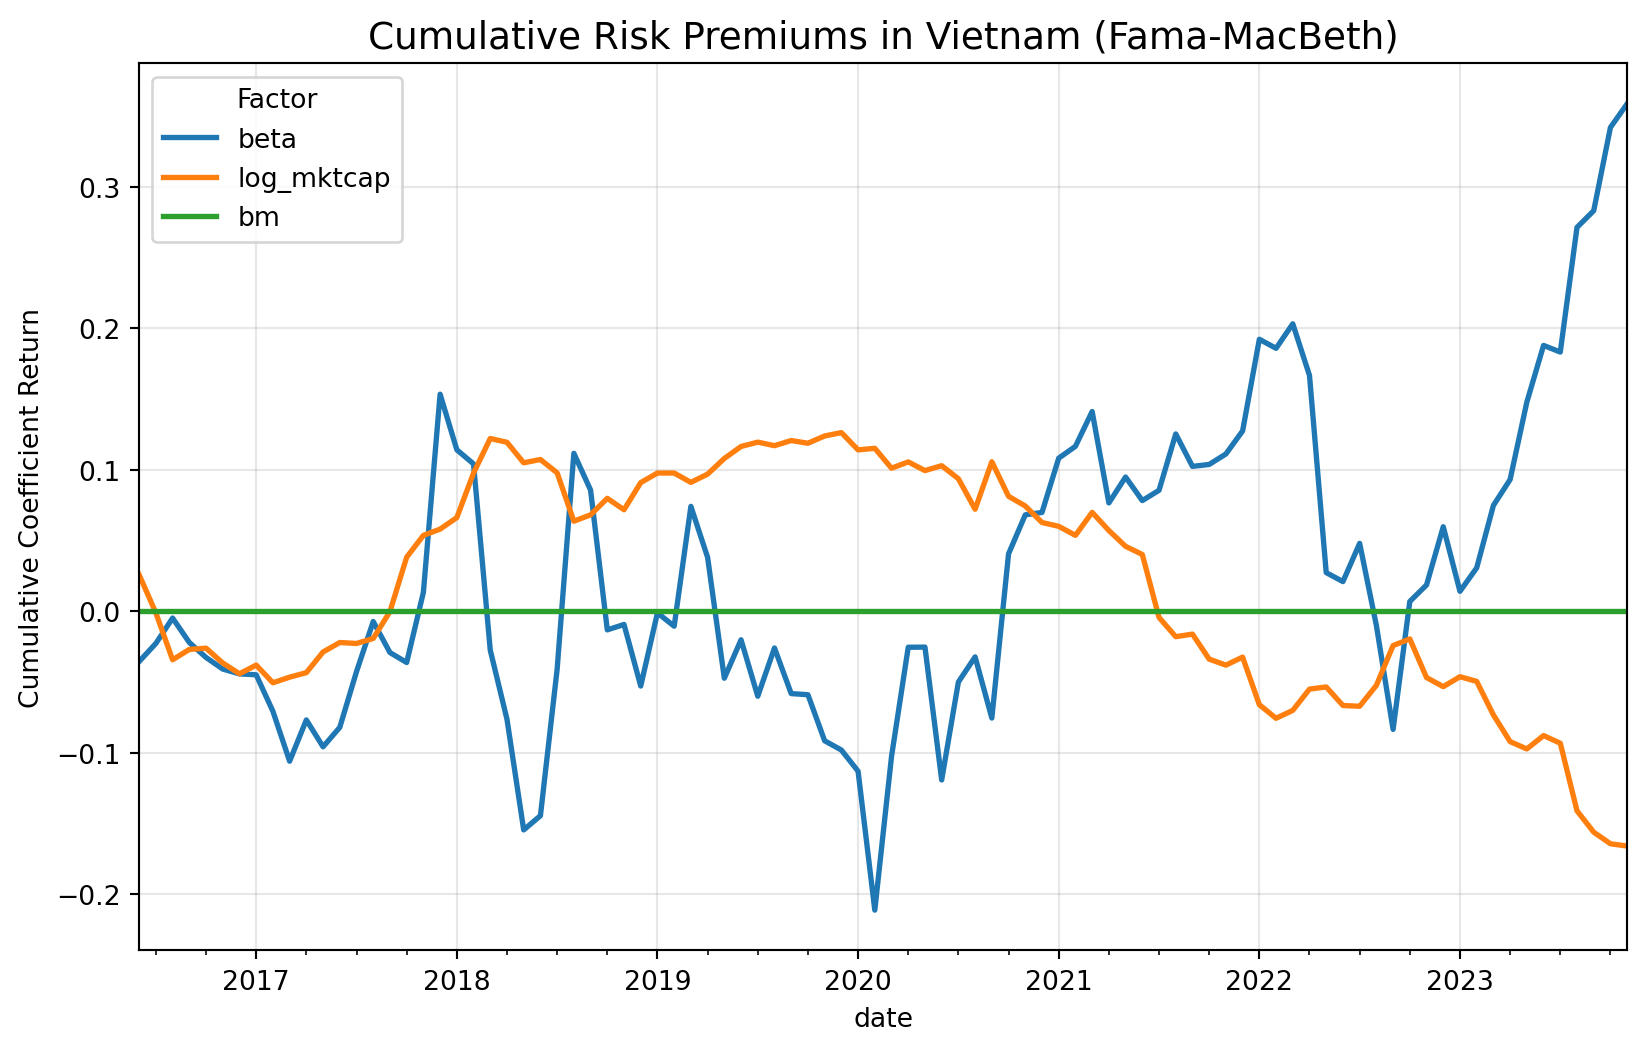

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate cumulative returns of the factors (as if they were tradable portfolios)
cumulative_premiums = (risk_premiums
    .set_index("date")
    .drop(columns=["Intercept"])
    .cumsum()
)

fig, ax = plt.subplots(figsize=(10, 6))
cumulative_premiums.plot(ax=ax, linewidth=2)
ax.set_title("Cumulative Risk Premiums in Vietnam (Fama-MacBeth)", fontsize=14)
ax.set_ylabel("Cumulative Coefficient Return")
ax.legend(title="Factor")
ax.grid(True, alpha=0.3)
plt.show()